## Load the data

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
library(tableone)
library(leaflet)
library(noncensus) 
suppressWarnings(suppressMessages(library(sp)))
suppressWarnings(suppressMessages(library(rgdal)))
suppressWarnings(suppressMessages(library(geojsonio)))
library(ggpubr)
suppressWarnings(suppressMessages(library(gridExtra)))
suppressWarnings(suppressMessages(library(rstatix)))

load("~/Documents/holding_gwu_dissertation/data/study1_data.RData")
vcf_data <- vcf_data %>% filter(vaccinated_prior == FALSE)

# Political Affiliation
vcf_data$political_affiliation[vcf_data$political_affiliation %in% c("Other (please describe):",
                                                                       "Prefer not to answer")] <- "Other"

# Political Views
vcf_data$political_view[vcf_data$political_view %in% c("Slightly conservative",
                                                         "Very conservative")] <- "Conservative"
vcf_data$political_view[vcf_data$political_view %in% c("Slightly liberal",
                                                         "Very liberal")] <- "Liberal"

# Relabel the group variable
vcf_data$group <- vcf_data$group %>% as.character()
vcf_data$group[vcf_data$group == "Gist"] <- "Treatment"
vcf_data$group <- factor(vcf_data$group, levels = c("Treatment", "Control"))

# Relabel the trust variables
vcf_data$fed_gov_distrust <- FALSE
vcf_data$fed_gov_distrust[vcf_data$fed_gov_trust == "Not at all"] <- TRUE
vcf_data$local_gov_distrust <- FALSE
vcf_data$local_gov_distrust[vcf_data$local_gov_trust == "Not at all"] <- TRUE
vcf_data$cdc_distrust <- FALSE
vcf_data$cdc_distrust[vcf_data$cdc_trust == "Not at all"] <- TRUE
vcf_data$fda_distrust <- FALSE
vcf_data$fda_distrust[vcf_data$fda_trust == "Not at all"] <- TRUE

## Satisfied with program

In [2]:
vcf_data %>% filter(!is.na(program_satisfaction_6), group == "Treatment") %>% 
    summarize(satisfied_count = sum(as.numeric(program_satisfaction_6) >= 5),
              total = n(),
              perc = satisfied_count/total)

satisfied_count,total,perc
<int>,<int>,<dbl>
136,182,0.7472527


## Would recommend the group to others

In [3]:
vcf_data %>% filter(!is.na(recommend_group_6), group == "Treatment") %>% 
    summarize(satisfied_count = sum(as.numeric(recommend_group_6) >= 4),
              total = n(),
              perc = satisfied_count/total)

satisfied_count,total,perc
<int>,<int>,<dbl>
95,182,0.521978


## Program rating boxplots

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“The `fun.ymin` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.min` argument instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“The `fun.ymax` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.max` argument instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


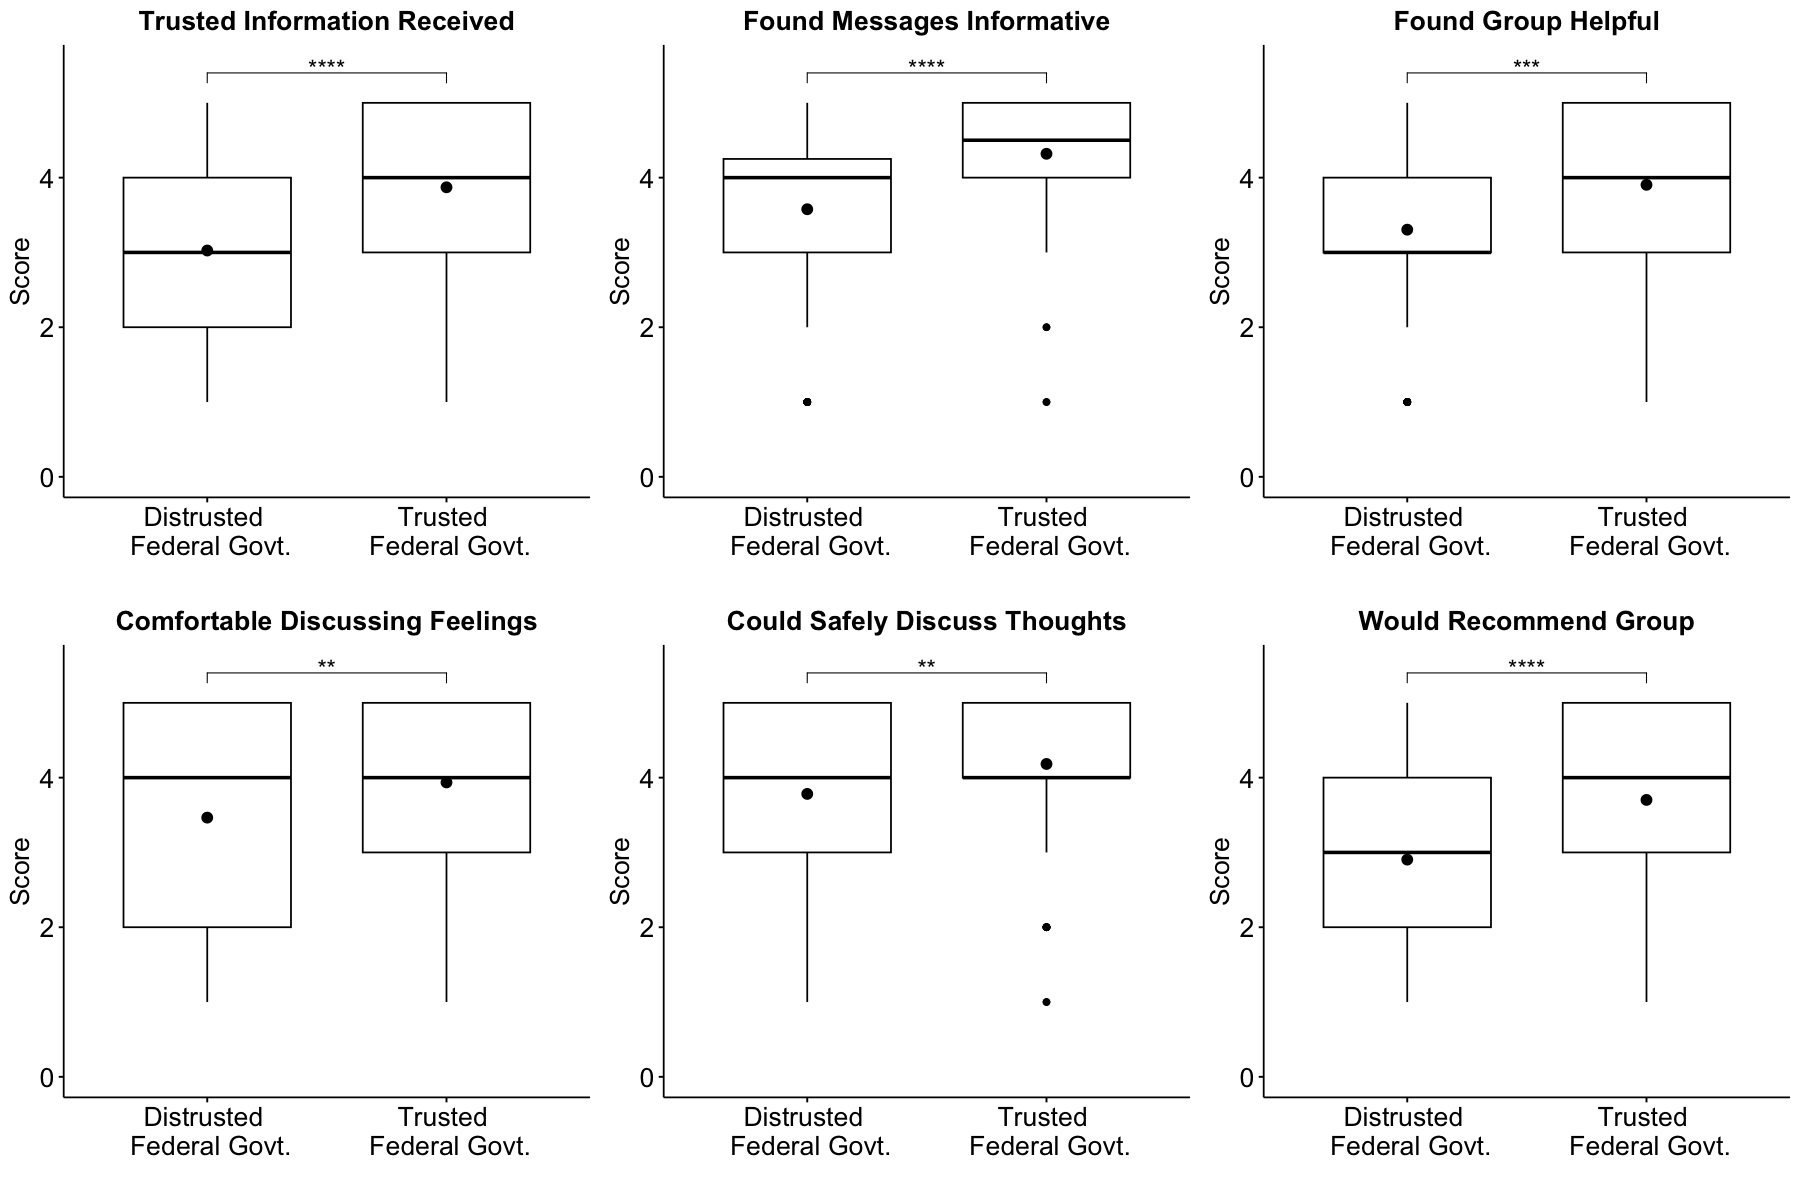

In [4]:
create_boxplot <- function(measure, label){
    temp <- vcf_data %>% filter(group == "Treatment") %>% 
      select(val = all_of(measure), fed_gov_distrust) %>% filter(!is.na(val)) %>%
      mutate(val = val %>% as.numeric())
    temp$fed_gov_distrust <- temp$fed_gov_distrust %>% as.character()
    temp$fed_gov_distrust[temp$fed_gov_distrust == FALSE] <- "Trusted \n Federal Govt."
    temp$fed_gov_distrust[temp$fed_gov_distrust == TRUE] <- "Distrusted \n Federal Govt."
    temp$fed_gov_distrust <- factor(temp$fed_gov_distrust, levels = c("Distrusted \n Federal Govt.", "Trusted \n Federal Govt."))
    
    temp <- temp %>% filter(!is.na(val), !is.na(fed_gov_distrust))
    
    stat.test <- temp %>% 
                    t_test(val ~ fed_gov_distrust, detailed = TRUE, 
                                 paired = FALSE, alternative = "less") %>%
                    add_significance() %>% mutate(y.position = 5.3 + .1)

    ggboxplot(data = temp, 
          x = "fed_gov_distrust", y = "val", add="mean",
          xlab = "", ylab = "Score", main = label,
          legend = "none")+       
      stat_pvalue_manual(stat.test, label = "{p.signif}", size = 5) +
      ylim(0, 5.5) +
      guides(fill = "none") +
      theme(plot.title = element_text(hjust = 0.5)) +
      theme( 
      axis.text.x = element_text(size = 16, color= "black"),
      axis.text.y = element_text(size = 16, color= "black"),
      axis.title = element_text(size = 16, color= "black"),
      plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
    ) 
}

p1 <- create_boxplot(measure = "trust_info_received_4", label = "Trusted Information Received")
p2 <- create_boxplot(measure = "messages_informative_4", label = "Found Messages Informative")
p3 <- create_boxplot(measure = "group_helpful_4", label = "Found Group Helpful")
p4 <- create_boxplot(measure = "felt_comfortable_4", label = "Comfortable Discussing Feelings")
p5 <- create_boxplot(measure = "safely_discuss_4", label = "Could Safely Discuss Thoughts")
p6 <- create_boxplot(measure = "recommend_group_4", label = "Would Recommend Group")

options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 120)
grid.arrange(p1, p2, p3, p4, p5, p6, ncol=3)

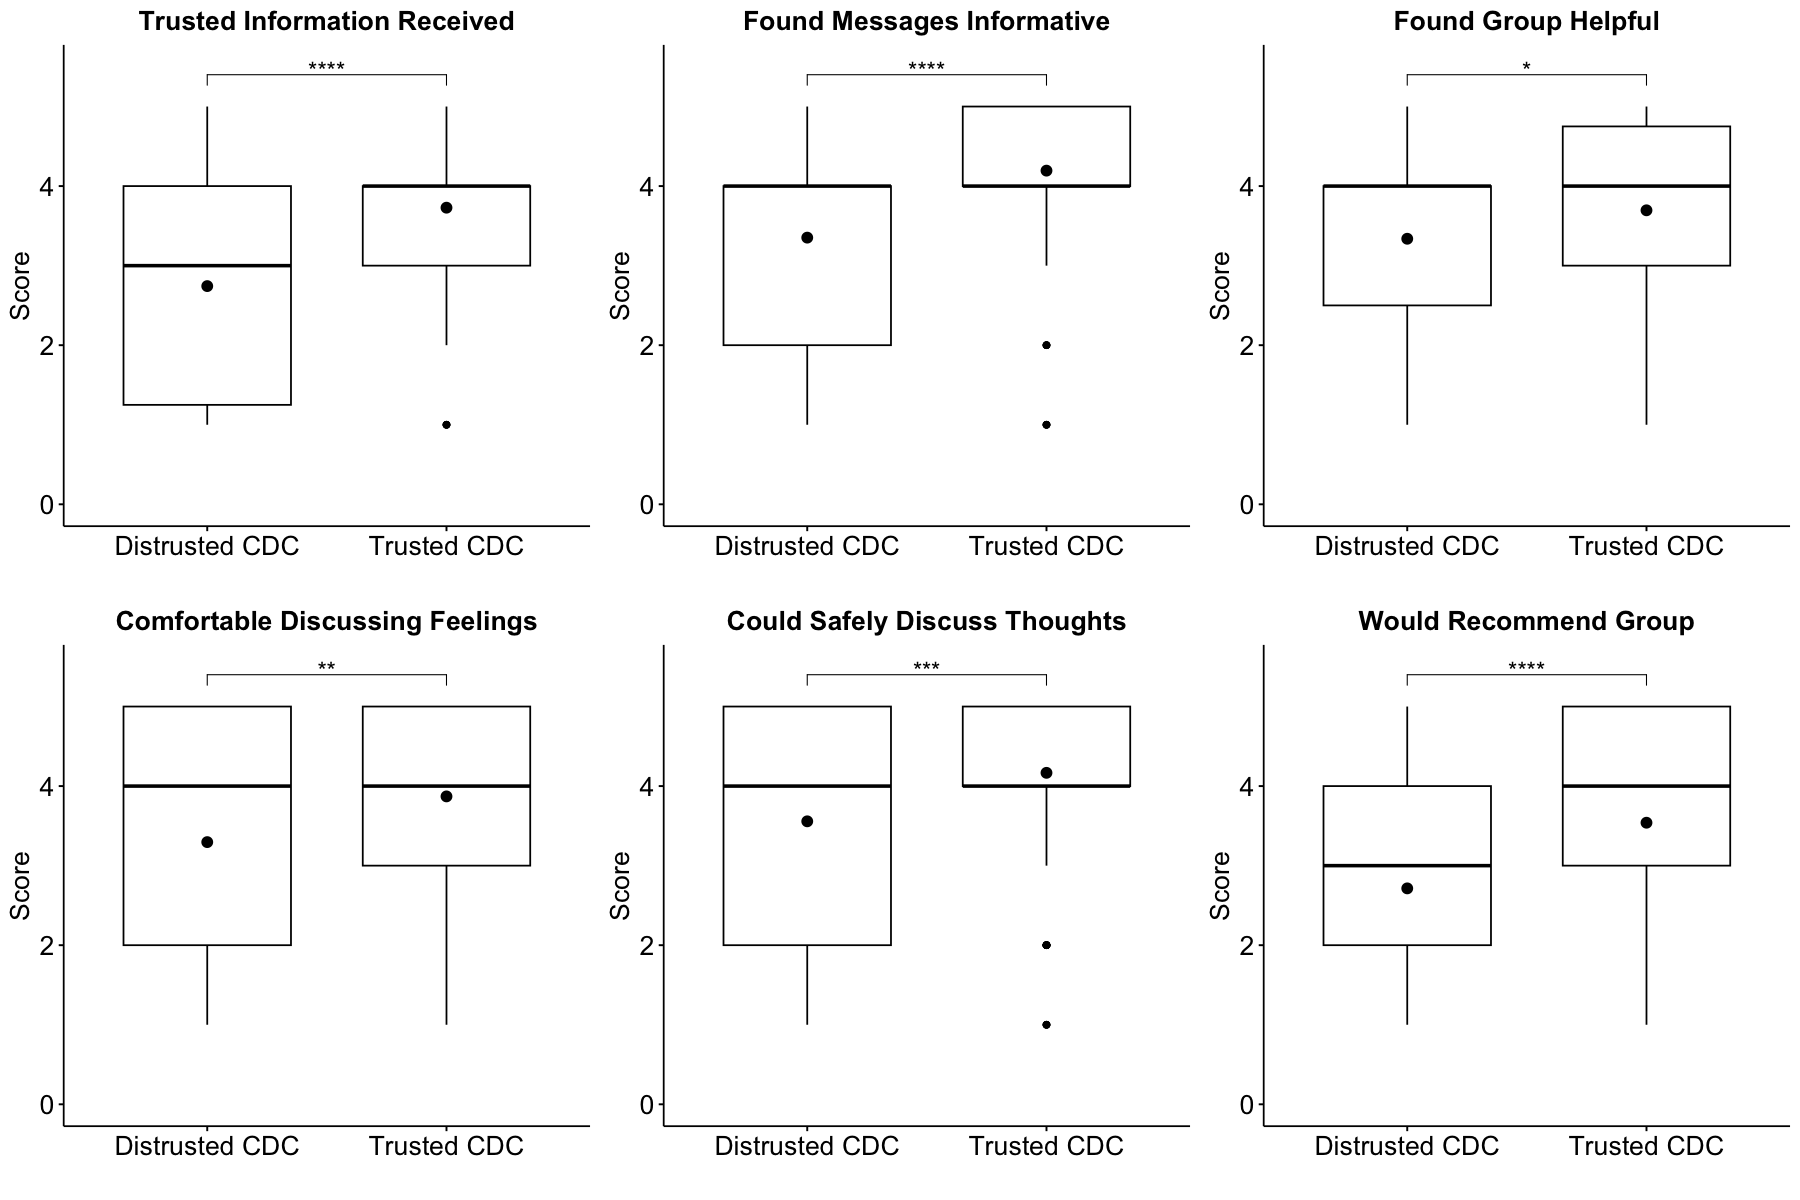

In [5]:
create_boxplot <- function(measure, label){
    temp <- vcf_data %>% filter(group == "Treatment") %>% 
      select(val = all_of(measure), cdc_distrust) %>% filter(!is.na(val)) %>%
      mutate(val = val %>% as.numeric())
    temp$cdc_distrust <- temp$cdc_distrust %>% as.character()
    temp$cdc_distrust[temp$cdc_distrust == FALSE] <- "Trusted CDC"
    temp$cdc_distrust[temp$cdc_distrust == TRUE] <- "Distrusted CDC"
    temp$cdc_distrust <- factor(temp$cdc_distrust, levels = c("Distrusted CDC", "Trusted CDC"))
    
    temp <- temp %>% filter(!is.na(val), !is.na(cdc_distrust))
    
    stat.test <- temp %>% 
                    t_test(val ~ cdc_distrust, detailed = TRUE, 
                                 paired = FALSE, alternative = "less") %>%
                    add_significance() %>% mutate(y.position = 5.3 + .1)

    ggboxplot(data = temp, 
          x = "cdc_distrust", y = "val", add="mean",
          xlab = "", ylab = "Score", main = label,
          legend = "none")+       
      stat_pvalue_manual(stat.test, label = "{p.signif}", size = 5) +
      ylim(0, 5.5) +
      guides(fill = "none") +
      theme(plot.title = element_text(hjust = 0.5)) +
      theme( 
      axis.text.x = element_text(size = 16, color= "black"),
      axis.text.y = element_text(size = 16, color= "black"),
      axis.title = element_text(size = 16, color= "black"),
      plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
    ) 
}

p1 <- create_boxplot(measure = "trust_info_received_4", label = "Trusted Information Received")
p2 <- create_boxplot(measure = "messages_informative_4", label = "Found Messages Informative")
p3 <- create_boxplot(measure = "group_helpful_4", label = "Found Group Helpful")
p4 <- create_boxplot(measure = "felt_comfortable_4", label = "Comfortable Discussing Feelings")
p5 <- create_boxplot(measure = "safely_discuss_4", label = "Could Safely Discuss Thoughts")
p6 <- create_boxplot(measure = "recommend_group_4", label = "Would Recommend Group")

options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 120)
grid.arrange(p1, p2, p3, p4, p5, p6, ncol=3)

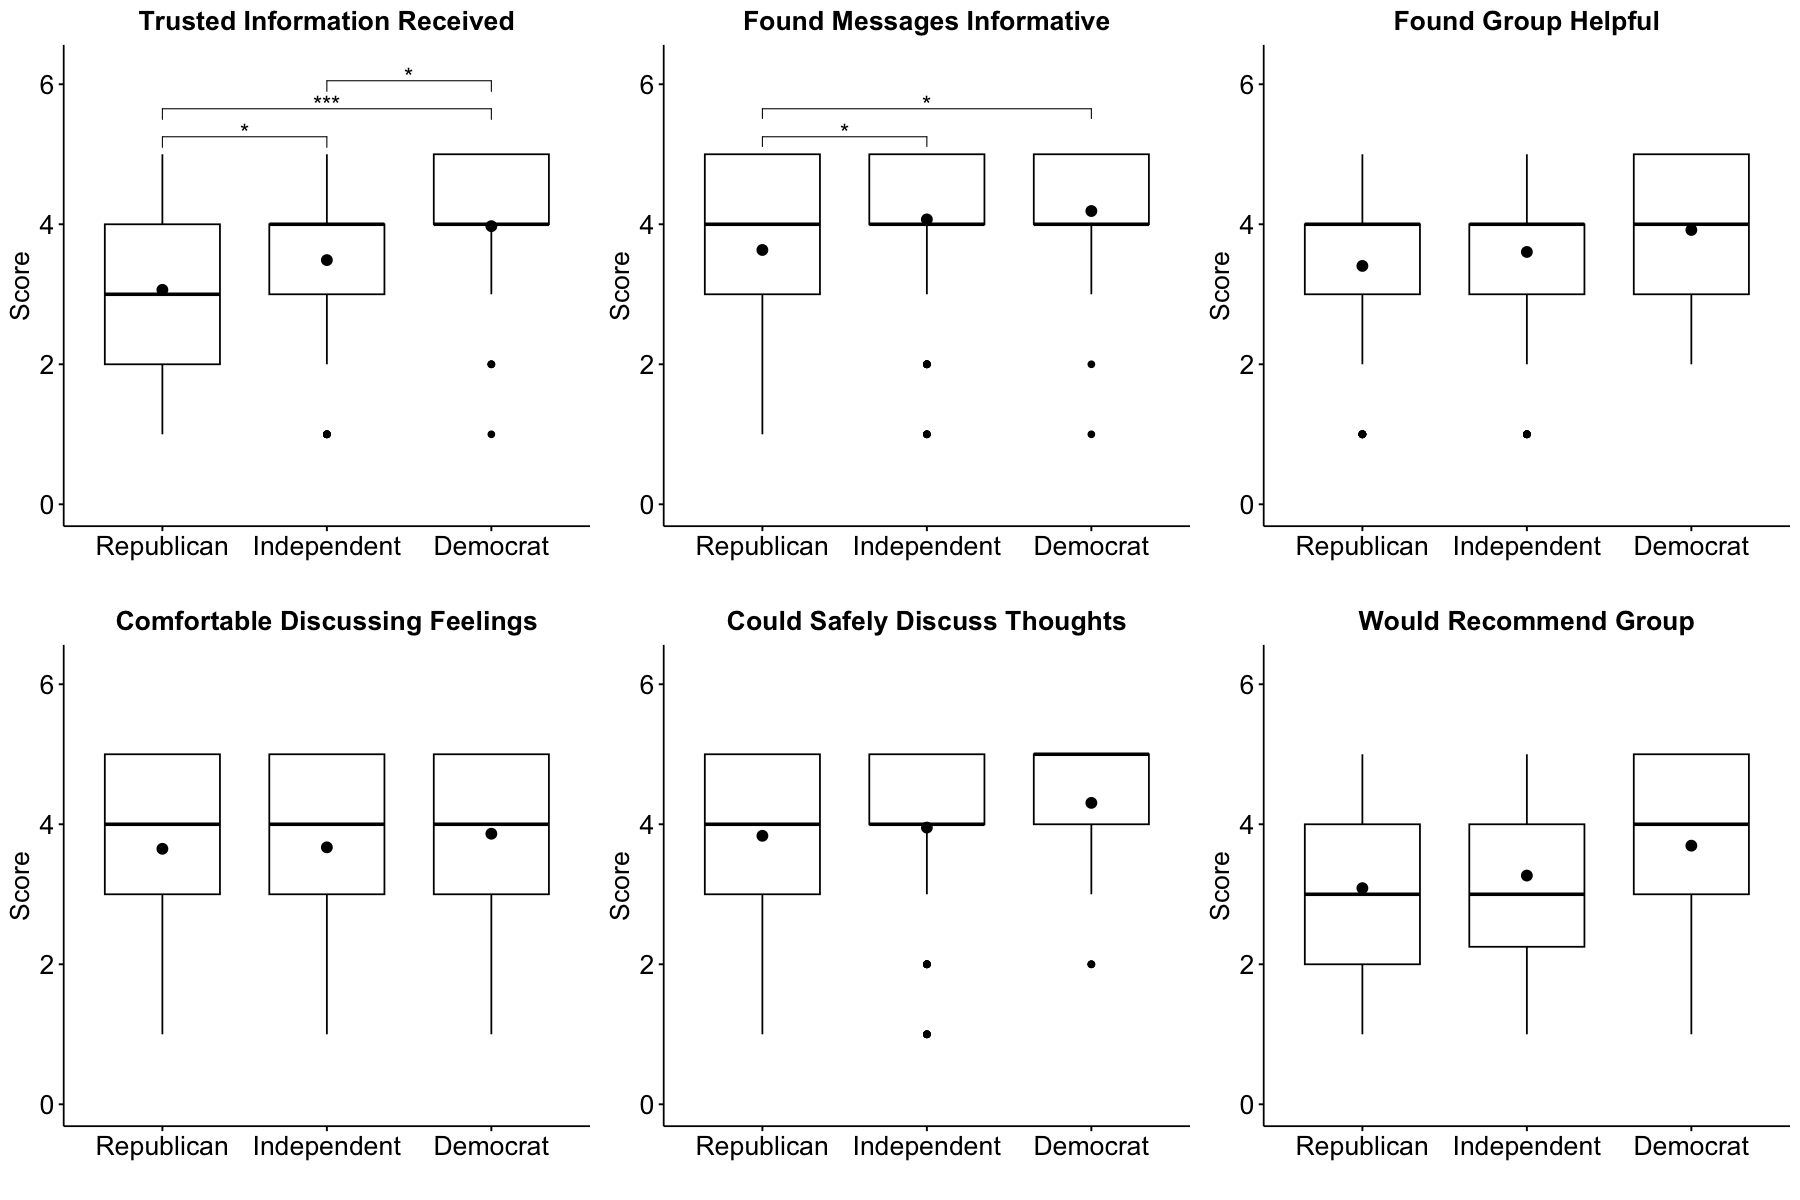

In [6]:
create_boxplot <- function(measure, label){
    temp <- vcf_data %>% filter(group == "Treatment") %>% 
      select(val = all_of(measure), political_affiliation) %>% filter(!is.na(val)) %>%
      mutate(val = val %>% as.numeric())
    
    temp <- temp %>% filter(!is.na(val), !is.na(political_affiliation)) %>%
            filter(political_affiliation != "Other")
    
    stat.test <- temp %>% 
                    t_test(val ~ political_affiliation, detailed = TRUE, 
                                 paired = FALSE, alternative = "two.sided") %>%
                    add_significance() %>% mutate(y.position = 0)
    stat.test$y.position[3] <- 5.25
    stat.test$y.position[2] <- 5.65
    stat.test$y.position[1] <- 6.05
    stat.test <- stat.test %>% filter(p.adj.signif != "ns")   

    ggboxplot(data = temp, 
          x = "political_affiliation", y = "val", add="mean",
          xlab = "", ylab = "Score", main = label,
          legend = "none")+       
      stat_pvalue_manual(stat.test, label = "{p.adj.signif}", size = 5) +
      ylim(0, 6.25) +
      guides(fill = "none") +
      theme(plot.title = element_text(hjust = 0.5)) +
      theme( 
      axis.text.x = element_text(size = 16, color= "black"),
      axis.text.y = element_text(size = 16, color= "black"),
      axis.title = element_text(size = 16, color= "black"),
      plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
    ) 
}

p1 <- create_boxplot(measure = "trust_info_received_4", label = "Trusted Information Received")
p2 <- create_boxplot(measure = "messages_informative_4", label = "Found Messages Informative")
p3 <- create_boxplot(measure = "group_helpful_4", label = "Found Group Helpful")
p4 <- create_boxplot(measure = "felt_comfortable_4", label = "Comfortable Discussing Feelings")
p5 <- create_boxplot(measure = "safely_discuss_4", label = "Could Safely Discuss Thoughts")
p6 <- create_boxplot(measure = "recommend_group_4", label = "Would Recommend Group")

options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 120)
grid.arrange(p1, p2, p3, p4, p5, p6, ncol=3)